In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img=cv2.imread("./test.jpg")   # bgr image
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

            # or we can do directly by 
# img=cv2.imread("./test.jpg",0)

In [3]:
# thresholding
_,th1=cv2.threshold(gray,127,gray.max(),cv2.THRESH_BINARY)

In [4]:
# contours
contours, hierarchy=cv2.findContours(th1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

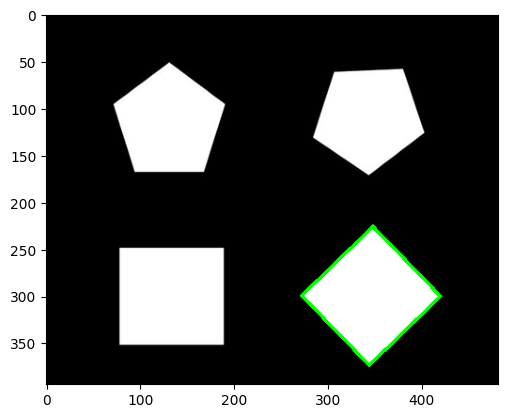

In [5]:
# draw contours
plt.imshow(cv2.drawContours(img,contours,1,(0,255,0),3))

In [6]:
# plt.imshow(cv2.drawContours(img,contours[0],0,(0,255,0),3))

# contour features

In [7]:
cnt=contours[0]
M=cv2.moments(cnt)
cx=int(M['m10']/M['m00'])
cy=int(M['m01']/M['m00'])
img[cx,cy]=[0, 0, 0]
cv2.imshow("Contour", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# cv2.putText(img, 'Contour:1', (cy, cx), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# contours Area

In [9]:
cnt=contours[0]

M=cv2.moments(cnt)

area=M["m00"]
# print(area)

# area=cv2.contourArea(contours[0])

# contour perimter

In [10]:
perimeter=cv2.arcLength(cnt,True)

In [11]:
perimeter

424.0

# Bounding rectangle

In [18]:
# contours 
# x,y,w,h=cv2.boundingRect(cnt)
x,y,w,h=cv2.boundingRect(contours[0])

cv2.rectangle(img, (x,y),(x+w,y+h),(255,255,0),2)
cv2.imshow('frame',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# rotated Rectangle

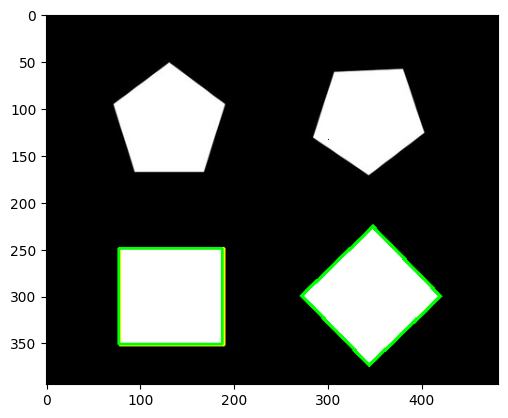

In [20]:
rect=cv2.minAreaRect(contours[0])
box=cv2.boxPoints(rect)
box=np.int0(box)
cv2.drawContours(img,[box],0,(0,255,0),2)
plt.imshow(img)

# fitting line

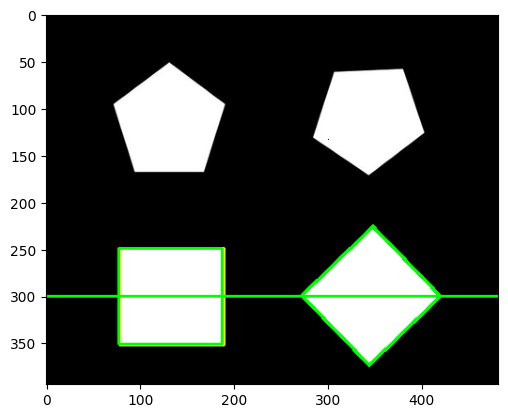

In [29]:
rows,cols=img.shape[:2]

[vx,vy,x,y]=cv2.fitLine(cnt,cv2.DIST_L2,0,0.01,0,0.01)

lefty=int((-x*vy/vx)+y)
right=int(((cols-x)*vy/vx)+y)
cv2.line(img,(cols-1,right),(0,lefty),(0,255,0),2)
plt.imshow(img)